In [1]:
from hparams import hparams
from dataset import Dataset
from cnn_model import CNNModel
from tqdm import tqdm

import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

c:\soft\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset_folder = 'training_data/'
training_steps = 5000
summary_interval = 500

In [3]:
tf.reset_default_graph()

dataset = Dataset(dataset_folder, hparams)

with tf.variable_scope('vad'):
    train_model = CNNModel(hparams)
    train_model.initialize(dataset.train_features, dataset.train_labels, True)
    train_model.compute_loss()

with tf.name_scope('training'):
    optimizer = tf.train.MomentumOptimizer(0.01, 0.5)
    training_op = optimizer.minimize(train_model.loss)

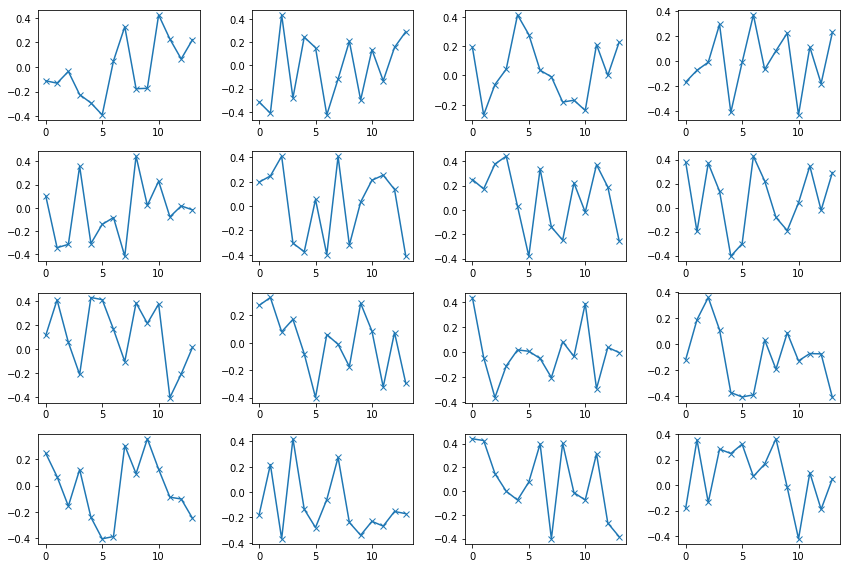

In [4]:
sess = tf.Session()

#     saver = tf.train.Saver(tf.trainable_variables())
sess.run(tf.global_variables_initializer())
dataset.initialize(sess)

filters = sess.run(tf.trainable_variables()[0])
filters = np.squeeze(filters)
plt.figure(figsize=(12, 8))
for i, f in enumerate(filters.T):
    plt.subplot(4, 4, i+1)
    plt.plot(f, 'x-')

plt.tight_layout()

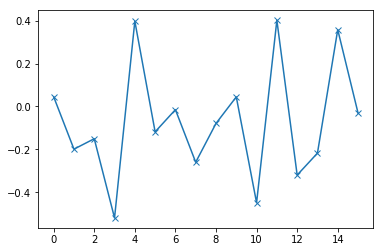

In [5]:
weights = sess.run(tf.trainable_variables()[2])
weights = np.squeeze(weights)
plt.plot(weights, 'x-')

In [6]:
train_losses = []
test_losses = []

for i in tqdm(range(500)):
    sess.run(training_op)
    
    if i % summary_interval == 0:
        train_loss = sess.run(train_model.loss)
#         train_loss, test_loss = sess.run([train_model.loss, test_model.loss])
        train_losses.append(train_loss)
#         test_losses.append(test_loss)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 111.42it/s]


In [7]:
filters = sess.run(tf.trainable_variables()[0])
filters = np.squeeze(filters)

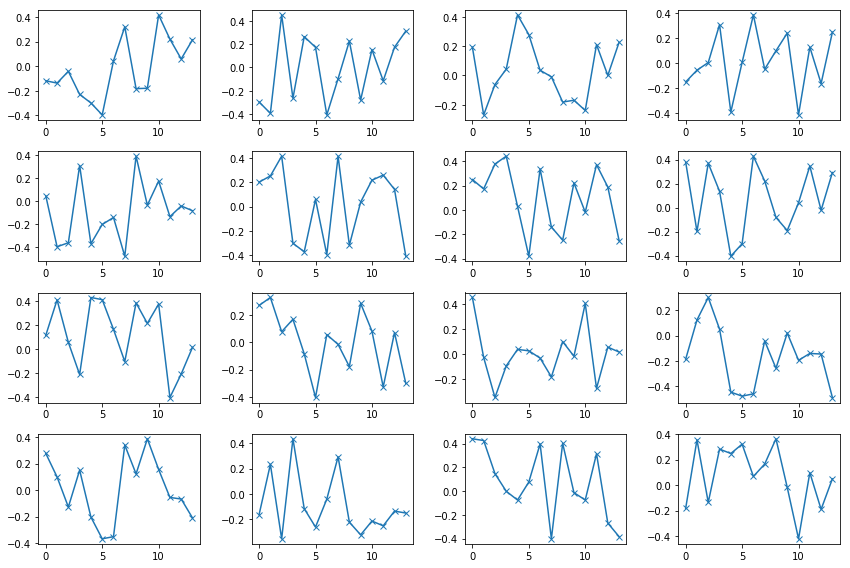

In [8]:
plt.figure(figsize=(12, 8))
for i, f in enumerate(filters.T):
    plt.subplot(4, 4, i+1)
    plt.plot(f, 'x-')
    
plt.tight_layout()

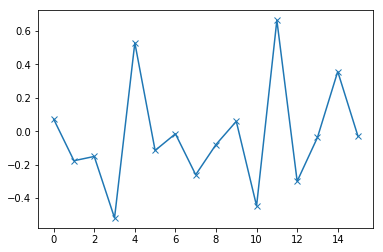

In [9]:
weights = sess.run(tf.trainable_variables('vad')[2])
weights = np.squeeze(weights)
plt.plot(weights, 'x-')

In [10]:
sess.run(dataset.train_labels)

array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0.], dtype=float32)